# Import packages

In [1]:
#import the libraries used for data loading, cleaning and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for decision tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

#for neural-network
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch

#for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

#for support vector machine
from sklearn.svm import SVC

#for k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier


# Part I. Breast cancer prediction

## Loading breast cancer dataset

In [2]:
bc_dataset = pd.read_csv("../data/breast_cancer_dataset.csv")
bc_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
bc_dataset.diagnosis.unique()

array(['M', 'B'], dtype=object)

## Data cleaning and data wrangling

In [4]:
bc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Separating target from features
#drop columns "id"
y = bc_dataset.diagnosis
list = ["id", "diagnosis"]
features = bc_dataset.drop(list, axis=1, inplace=False)
bc_dataset.drop(["id"], axis=1, inplace=True)

In [6]:
print(bc_dataset.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Exploratory Data Analysis (EDA)

In [7]:
# The frequency of cancer stages
B, M = bc_dataset['diagnosis'].value_counts()
print("Number of Malignant: ", M)
print("Number of Benign: ", B)

Number of Malignant:  212
Number of Benign:  357


d:\python_projects\cs7641_hw1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.8, 250, 'Benign = 357')

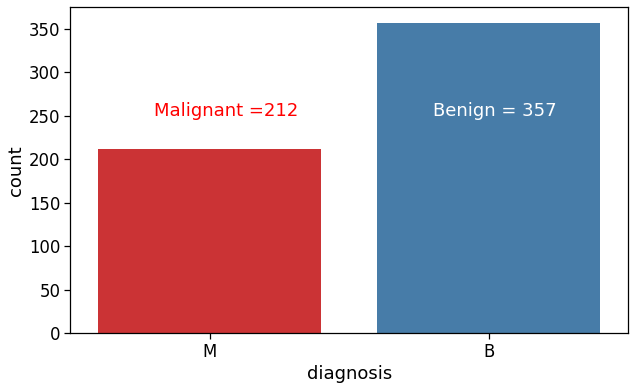

In [8]:
plt.figure(figsize=(10, 6))
sns.set_context('notebook',  font_scale=1.5)
sns.countplot('diagnosis', data=bc_dataset, palette="Set1")
plt.annotate("Malignant =212", xy=(-0.2, 250), xytext=(-0.2, 250), size=18, color="red")
plt.annotate("Benign = 357", xy=(0.8, 250), xytext=(0.8, 250), size=18, color="w")

In [9]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#bc_dataset.columns
bc_dataset.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# Standardization of features
stdX = (features - features.mean()) / (features.std())
data_st = pd.concat([y, stdX.iloc[:, :]], axis=1)
data_st = pd.melt(data_st, id_vars="diagnosis", var_name="features", value_name='value')

### Boxplot of features by diagnosis

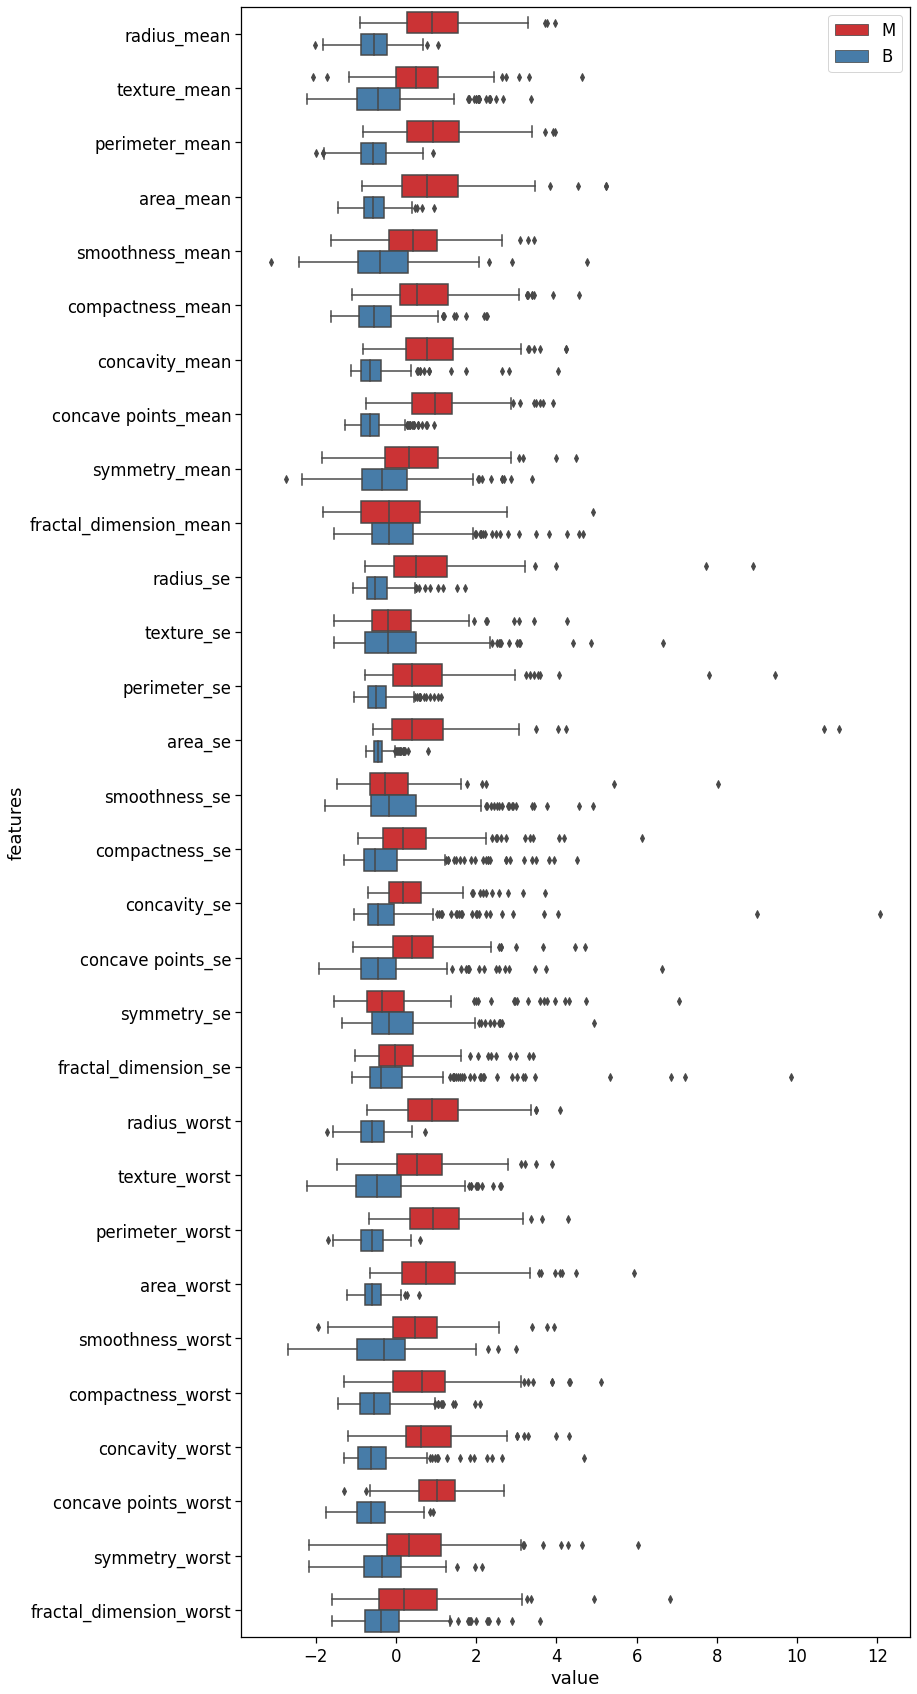

In [12]:
plt.figure(figsize=(12, 30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data_st, palette="Set1")
plt.legend(loc="best")

### Correlation

[Text(0.5, 1.0, 'Correlation analysis of features of the Breast Cancer dataset')]

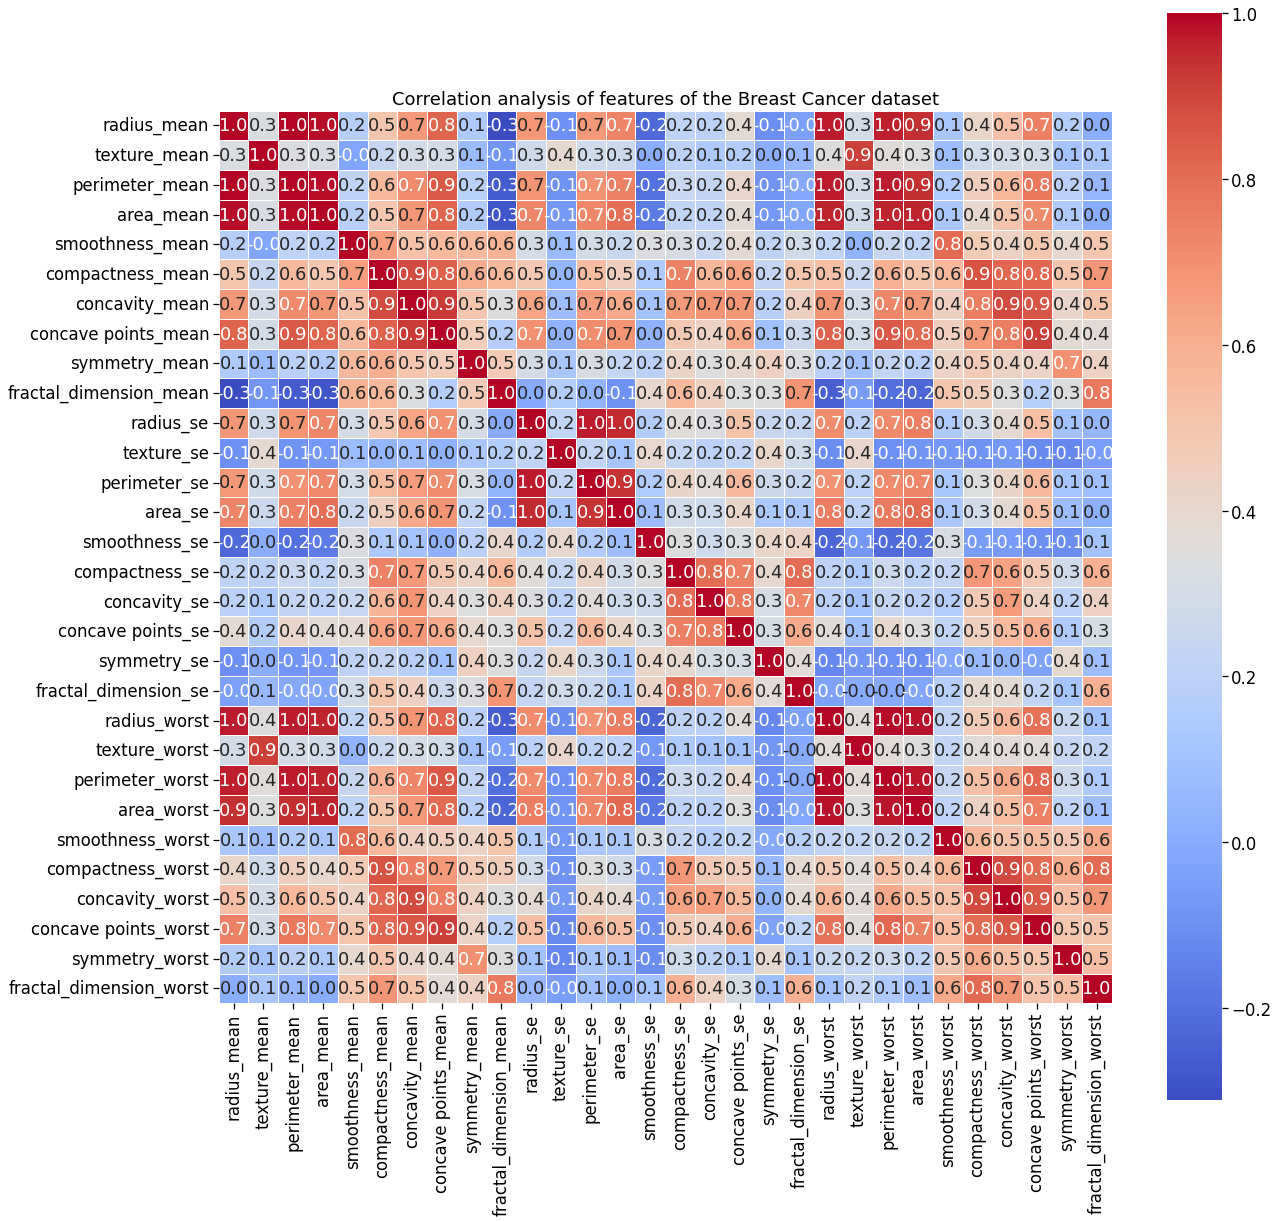

In [13]:
corr = bc_dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt=".1f", 
           xticklabels=True, yticklabels=True, cmap="coolwarm", linewidth=.5, ax=ax).set(title="Correlation analysis of features of the Breast Cancer dataset")

## Splitting the data into train and test sets

### Mapping the target: categorizing

In [14]:
# Map diagnosis column to integer value: 0, 1
data = bc_dataset.copy()
data["diagnosis"] = bc_dataset["diagnosis"].map({"M": 1, "B":0})

### Splitting the data

In [15]:
X = data.drop(['diagnosis'], axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Decision trees with pruning

In [16]:
# define a function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_decision_trees(X, y, tree_depths, cv=5, scoring="accuracy"):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_decision_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1, 1, figsize=(15,15))
    ax.plot(depths, cv_scores_mean, "-o", label="mean cross-validation accuracy", alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = (plt.ylim()[0], plt.ylim()[1] + 0.05)
    ax.plot(depths, accuracy_scores, '-*', label="train accuracy", alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Tree depth", fontsize=14)
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [17]:
# %%timeit -n 1000
#fitting trees of depth 1 to 24

tree_depths = range(1, 25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_decision_trees(X_train, y_train, tree_depths)

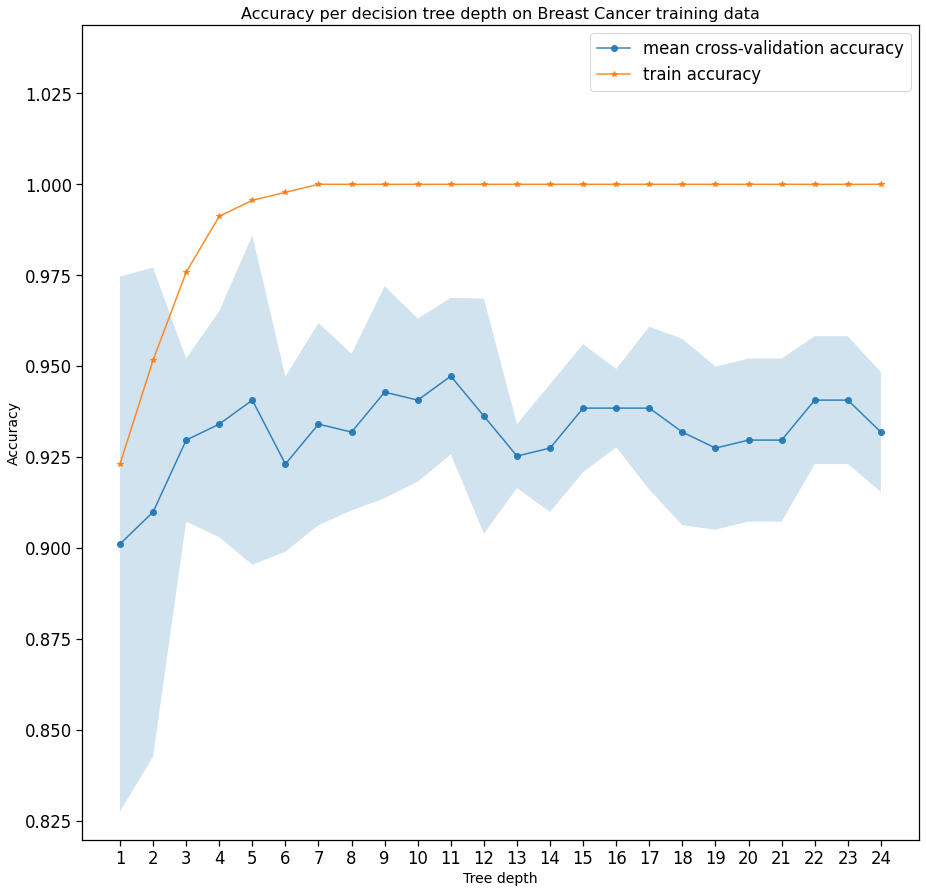

In [18]:
# plotting accuracy
plot_cross_validation_on_decision_trees(tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores,
                                       "Accuracy per decision tree depth on Breast Cancer training data")

In [19]:
sm_cv_scores_mean[0:10]

array([0.9010989 , 0.90989011, 0.92967033, 0.93406593, 0.94065934,
       0.92307692, 0.93406593, 0.93186813, 0.94285714, 0.94065934])

In [20]:
sm_accuracy_scores[0:10]

array([0.92307692, 0.95164835, 0.97582418, 0.99120879, 0.9956044 ,
       0.9978022 , 1.        , 1.        , 1.        , 1.        ])

In [21]:
# a function to build a single tree 
def run_a_single_tree(depth, X_train, y_train, X_test, y_test):
    tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    feature_importance = tree.feature_importances_
    accuracy_train = tree.score(X_train, y_train)
    accuracy_test = tree.score(X_test, y_test)
    return accuracy_train, accuracy_test, feature_importance

In [22]:
best_tree_depth = 4
accuracy_train, accuracy_test, feature_importance = run_a_single_tree(best_tree_depth, X_train, y_train, X_test, y_test)
print("Accuracy, Training Set: {:.3f}".format(accuracy_train))
print("Accuracy, Test Set: {:.3f}".format(accuracy_test))
print("Feature importance: \n{}".format(feature_importance))

Accuracy, Training Set: 0.991
Accuracy, Test Set: 0.939
Feature importance: 
[0.         0.03270718 0.         0.         0.         0.
 0.         0.73215992 0.         0.00892014 0.         0.
 0.         0.01253077 0.         0.         0.         0.
 0.         0.         0.05818902 0.02965463 0.02655506 0.01646795
 0.00961849 0.         0.07319683 0.         0.         0.        ]


Text(0.5, 1.0, 'Feature importance of Breast Cancer dataset')

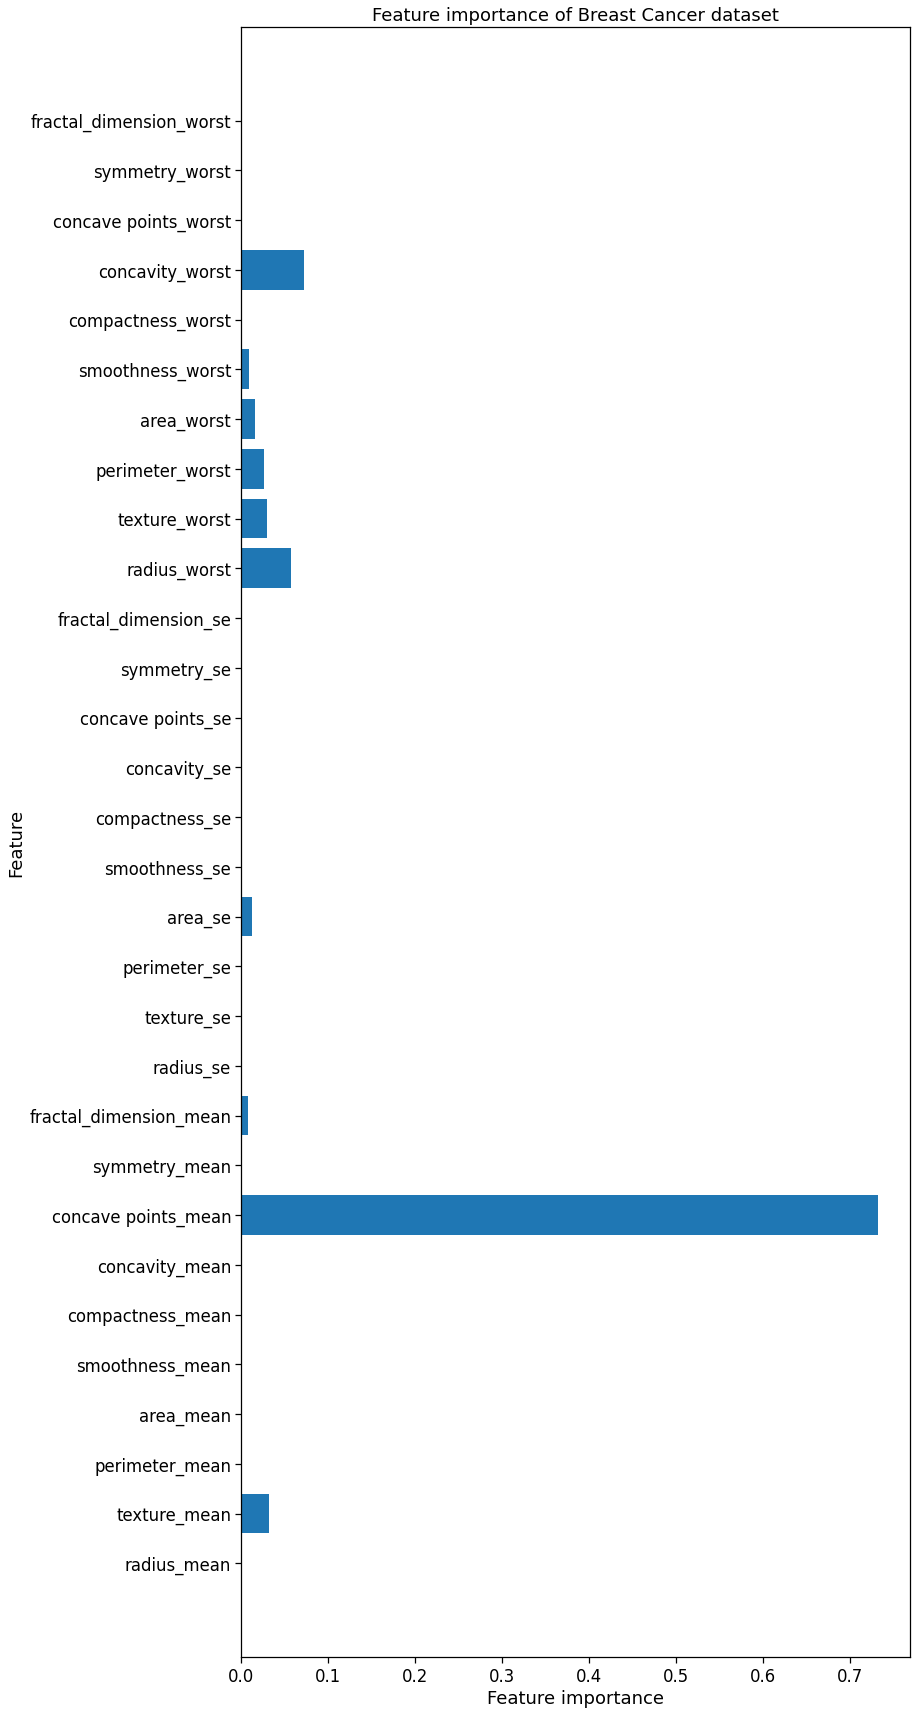

In [23]:
# plot feature importances
n_features = features.shape[1]
feature_names = features.columns.values
plt.figure(figsize=(12, 30))
plt.barh(range(n_features), feature_importance, align="center")
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance of Breast Cancer dataset")

## Nueral-Networks: KERAS-Tensorflow

In [24]:
## prepare data
predictors = data.drop(["diagnosis"], axis=1).values
target = to_categorical(data.diagnosis.values)
n_cols = predictors.shape[1]

In [25]:
#np.random.seed(43) for reproducibility
seed = 43
np.random.seed(seed)

In [26]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13, stratify=y)

In [27]:
# split training data into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

In [28]:
# initialize the label names
labelNames = ["Maglignant", "Benign"]

In [29]:
# initialize an early stopping callback to prevent the model from overfitting/spending too much time training
# with minimal gains
es = EarlyStopping(
    monitor="val_loss",
    patience= 2,
    restore_best_weights=True
)

In [30]:
# plot the training loss and accuracy of neural network
def nn_plot_loss(H, title):
    plt.style.use("ggplot")
    plt.figure(figsize=(15, 15))
    plt.plot(H.history["loss"], label="train_loss")
    plt.plot(H.history["val_loss"], label="val_loss")
    plt.title(title)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    
def nn_plot_accuracy(H, title):
    plt.style.use("ggplot")
    plt.figure(figsize=(15, 15))
    plt.plot(H.history["accuracy"], label="train_acc")
    plt.plot(H.history["val_accuracy"], label="val_acc")
    plt.title(title)
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

In [31]:
# build_model function, which accepts a single object, hp, which is the hyperparameter tuning object from Keras Tuner
def build_model(hp):
    #  initialize the model
    model = Sequential()
    
    #first layer
    model.add(Dense(units=hp.Int("dense_units1", min_value=32, max_value=128, step=32),
                   activation="relu"))
    
    #hidden layer
    model.add(Dense(units=hp.Int("dense_units2", min_value=32, max_value=128, step=32),
                   activation="relu"))
    
    model.add(Dense(2, activation="softmax"))
    
    # initialize the learning rate choice and optimizer
    model.compile(
        optimizer=Adam(
            hp.Choice("learning_rate", values=[1e-1, 1e-2, 1e-3])),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model
   
    

In [32]:
# instantiate the random search tuner object
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="../output",
    project_name="Breast_cancer_prediction"
)

In [33]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
dense_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
dense_units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [34]:
# %%timeit -n 1000
# start the search for the best hyperparameter configuration

tuner.search(X_tr, y_tr, epochs=50, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.TensorBoard("../output")])

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.9560439586639404

Best val_accuracy So Far: 0.9560439586639404
Total elapsed time: 00h 00m 22s
INFO:tensorflow:Oracle triggered exit


In [35]:
# Query the results
tuner.results_summary()

Results summary
Results in ../output\Breast_cancer_prediction
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dense_units1: 128
dense_units2: 128
learning_rate: 0.01
Score: 0.9560439586639404
Trial summary
Hyperparameters:
dense_units1: 64
dense_units2: 32
learning_rate: 0.01
Score: 0.950549453496933
Trial summary
Hyperparameters:
dense_units1: 64
dense_units2: 32
learning_rate: 0.001
Score: 0.950549453496933


In [36]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [37]:
# Build the model with the optimal hyperparameters and train it on the entire training data for 50 epochs
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

print("Best epoch: {}".format(best_epoch,))

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 67.4399 - accuracy: 0.5385 - val_loss: 0.4158 - val_accuracy: 0.9121
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 2.4360 - accuracy: 0.7692 - val_loss: 0.3105 - val_accuracy: 0.9341
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.9011 - val_loss: 0.2612 - val_accuracy: 0.9341
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.9038 - val_loss: 0.2577 - val_accuracy: 0.9341
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8956 - val_loss: 0.2382 - val_accuracy: 0.9341
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3938 - accuracy: 0.8956 - val_loss: 0.1860 - val_accuracy: 0.9560
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.8819 - val_loss: 0.2001 - val_accuracy: 0.9231
Epoch 8/50
12/12 [

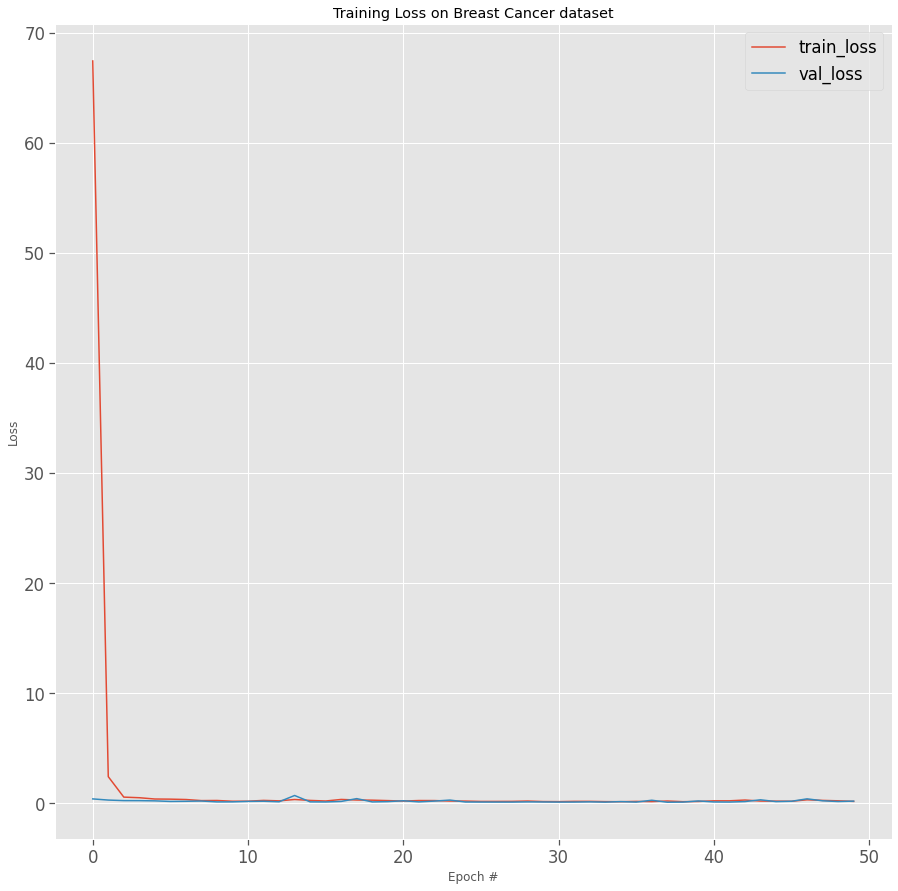

In [38]:
# plot loss of neural network
nn_plot_loss(history, "Training Loss on Breast Cancer dataset")


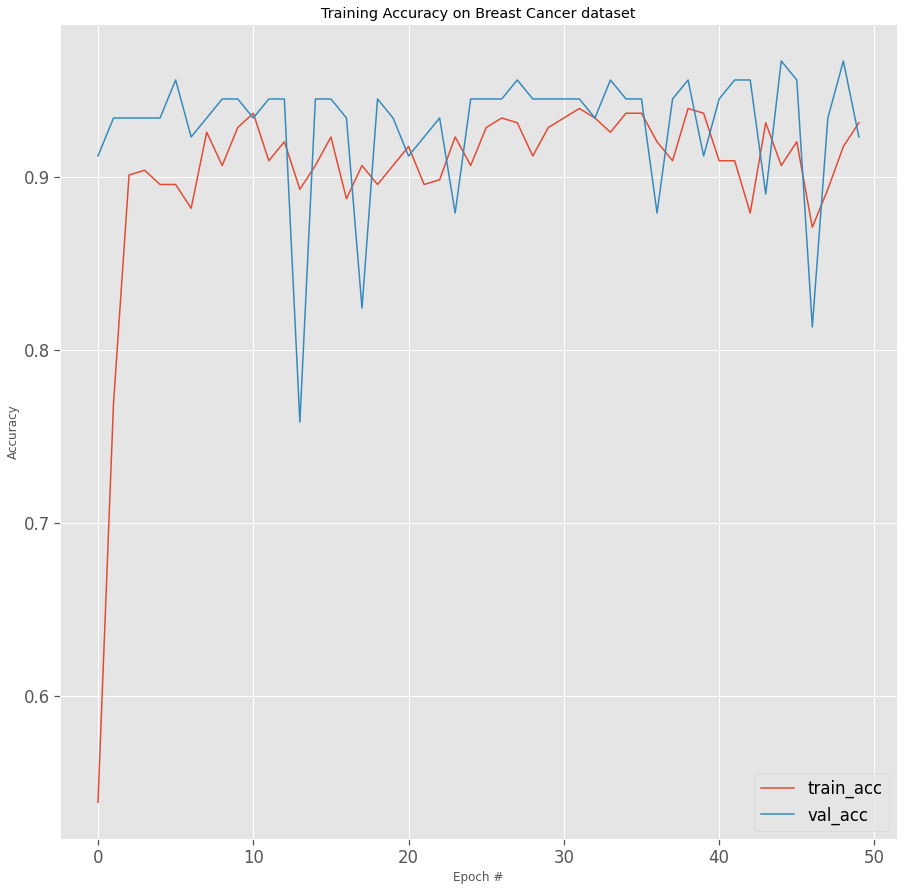

In [39]:
# plot accuracy of training of neural network model
nn_plot_accuracy(history, "Training Accuracy on Breast Cancer dataset")           

In [40]:
# evaluate the hypermodel on the test data
eval_result = hypermodel.evaluate(X_test, y_test)
print("Test loss: {:.4f}, Test accuracy: {:.4f}".format(eval_result[0], eval_result[1]))

4/4 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9123
Test loss: 0.2058, Test accuracy: 0.9123


## Boosting

In [41]:
# prepare data 
X = data.drop(['diagnosis'], axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [42]:
# instantiate a Boosting classifier and define the parameters
gbc = GradientBoostingClassifier()

parameters = {
    "n_estimators":[5, 50, 250, 500],
    "max_depth":[1, 3, 5],
    "learning_rate":[0.001, 0.01, 0.1, 1, 10]
}


In [43]:
# %%timeit -n 1000
# Use the GridSearhCV for the cross-validation

cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [5, 50, 250, 500]})

In [44]:
print("Best estimator:\n{}".format(cv.best_estimator_))

Best estimator:
GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=50)


In [45]:
results = pd.DataFrame(cv.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022031,0.000740,0.004401,0.000491,0.001,1,5,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,44
1,0.225368,0.037239,0.006987,0.002210,0.001,1,50,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,44
2,1.278128,0.136256,0.006922,0.001951,0.001,1,250,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.879121,0.626374,0.626374,0.626374,0.626374,0.676923,0.101099,43
3,2.228201,0.437145,0.006532,0.001990,0.001,1,500,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.912088,0.912088,0.912088,0.890110,0.923077,0.909890,0.010767,40
4,0.034103,0.004903,0.003101,0.000556,0.001,3,5,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,44


In [46]:
results_toplot = results[["param_learning_rate", "param_max_depth", "param_n_estimators", "mean_test_score"]]

In [47]:
results_toplot.head()

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score
0,0.001,1,5,0.626374
1,0.001,1,50,0.626374
2,0.001,1,250,0.676923
3,0.001,1,500,0.909890
4,0.001,3,5,0.626374


Text(0.5, 1.0, 'Mean test score vs Learning rate on Breat Cancer dataset')

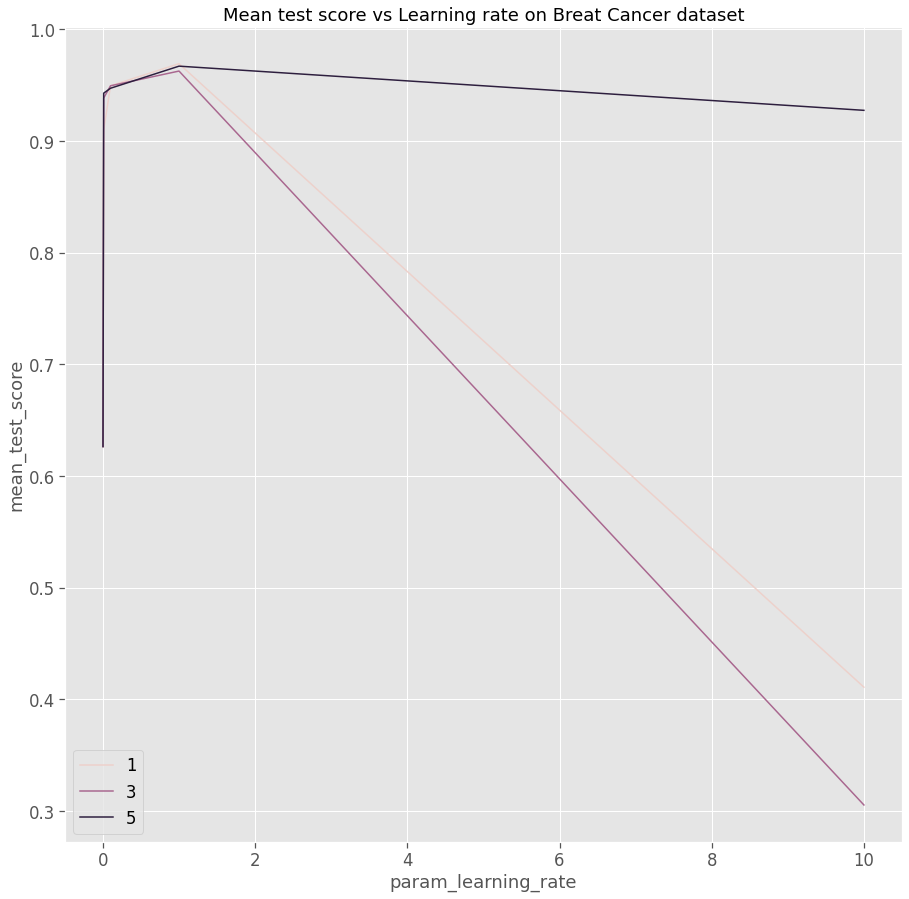

In [48]:
#plot the mean_test_score by learning rate and max_depth
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_learning_rate", y="mean_test_score", hue="param_max_depth",
                     data=results_toplot.loc[results_toplot["param_n_estimators"]==50])
plt.legend(loc="best")
plt.title("Mean test score vs Learning rate on Breat Cancer dataset")

In [49]:
# define the model based on the best hyperparameters
model = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=0)
model.fit(X_train, y_train)
print("Accuracy on training set: {:3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.974


## Support Vector Machines

In [50]:
# prepare data 
X = data.drop(['diagnosis'], axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [51]:
# search for the best hyperparameters
# SVC has a kernel parameter, depending on which kenerl is chosen, other parameters will be relevant.
# If kernal="linear", only the C parameter is used. If kernel='rbf', both the C and gamma are used.
param_grid = [{'kernel':['rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {
                 'kernel':['linear'],
                 'C':[0.001, 0.01, 0.1, 0.1, 1, 10, 100]
             }]

In [52]:
# %%timeit -n 1000
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.960


In [53]:
svm_results = pd.DataFrame(grid_search.cv_results_)
display(svm_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012786,0.002803,0.008406,0.001404,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.0,13
1,0.012806,0.002632,0.006996,0.001555,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.0,13
2,0.011392,0.000495,0.006611,0.000490,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.0,13
3,0.014009,0.000032,0.008003,0.000007,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.0,13
4,0.014808,0.002500,0.007427,0.000518,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.0,13


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Mean test score vs Param C Breat Cancer dataset')

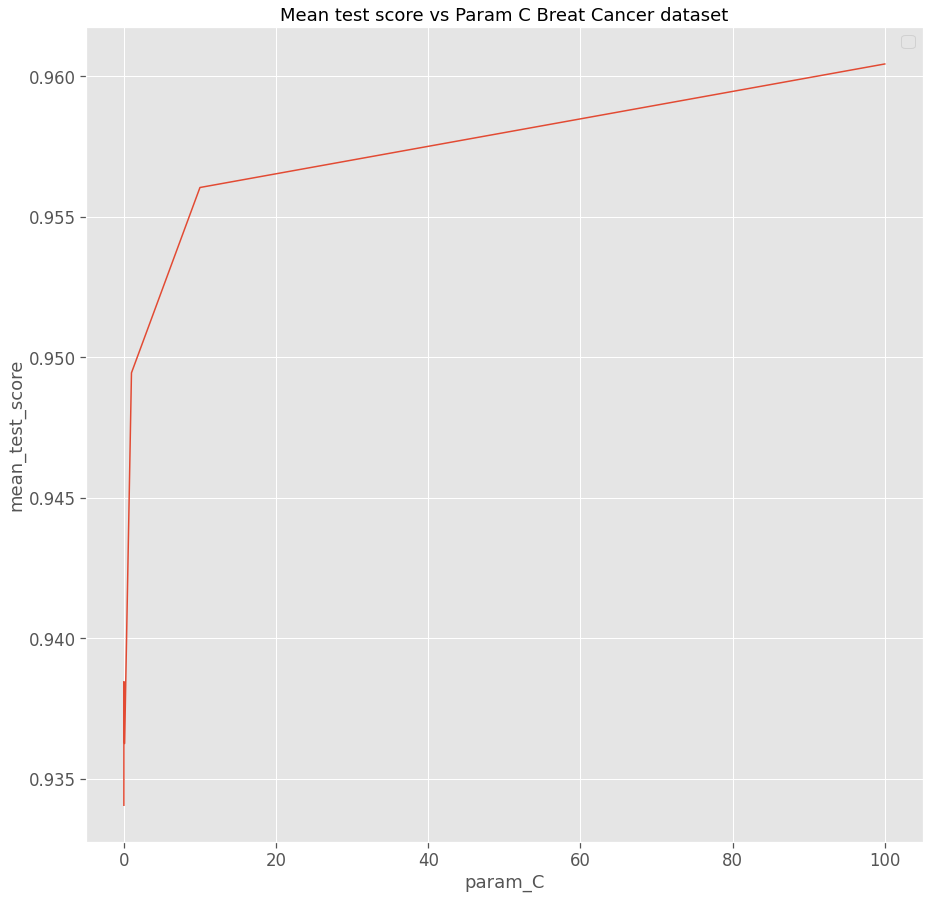

In [54]:
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_C", y="mean_test_score",
                     data=svm_results.loc[svm_results["param_kernel"]=="linear"])
plt.legend(loc="best")
plt.title("Mean test score vs Param C Breat Cancer dataset")

In [55]:
svm_results_rbf = svm_results.loc[svm_results["param_kernel"]=="rbf"]

In [56]:
svm_results_rbf = svm_results_rbf[["param_C", "param_gamma", "mean_test_score"]]

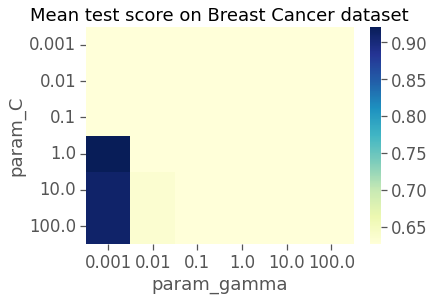

In [57]:
rbf_scores = svm_results_rbf.pivot("param_C", "param_gamma", "mean_test_score")
# plot the mean cross-validation scores of svm with rbf kernel
ax =sns.heatmap(rbf_scores, cmap="YlGnBu").set(title="Mean test score on Breast Cancer dataset")

In [58]:
# evaluate SVM with linear kernel with best parameter C of 100
svm_linear = SVC(kernel="linear", C=100)
svm_linear.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svm_linear.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_linear.score(X_test, y_test)))

Accuracy on training set: 0.971
Accuracy on test set: 0.982


In [59]:
# evaluate SVM with rbf kernel with best parameter C of 1, gamma of 0.001
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.001)
svm_rbf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svm_rbf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_rbf.score(X_test, y_test)))

Accuracy on training set: 0.976
Accuracy on test set: 0.895


## k-Nearest Neighbors

In [60]:
# prepare data 
X = data.drop(['diagnosis'], axis=1)
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [61]:
# create a knn model

knn = KNeighborsClassifier()

In [62]:
# create a dictionary of all values to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

In [63]:
# use gridsearch to test all values for n_neighbors
%timeit -n 1000
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [64]:
# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [65]:
# check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9318681318681319

In [66]:
knn_results = pd.DataFrame(knn_gscv.cv_results_)
display(knn_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002401,0.000490,0.004380,0.000785,1,{'n_neighbors': 1},0.890110,0.912088,0.945055,0.912088,0.956044,0.923077,0.024076,6
1,0.001598,0.000498,0.003804,0.000407,2,{'n_neighbors': 2},0.890110,0.923077,0.945055,0.912088,0.956044,0.925275,0.023466,2
2,0.002188,0.000982,0.005302,0.000915,3,{'n_neighbors': 3},0.912088,0.912088,0.945055,0.934066,0.956044,0.931868,0.017582,1
3,0.001201,0.000401,0.003800,0.000752,4,{'n_neighbors': 4},0.890110,0.912088,0.945055,0.912088,0.945055,0.920879,0.021308,16
4,0.001817,0.000758,0.004597,0.001029,5,{'n_neighbors': 5},0.868132,0.912088,0.956044,0.923077,0.945055,0.920879,0.030612,15


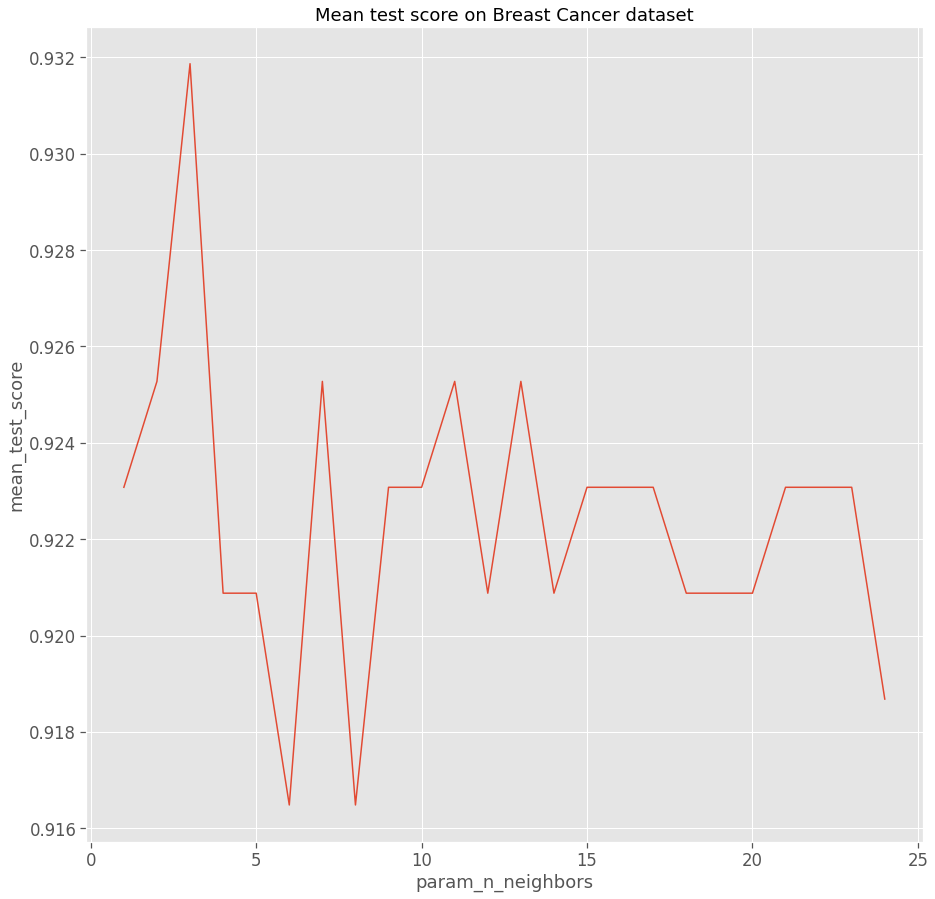

In [67]:
# plot the mean_test_score againt n_neighbors
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_n_neighbors", y="mean_test_score",
                     data=knn_results).set(title="Mean test score on Breast Cancer dataset")


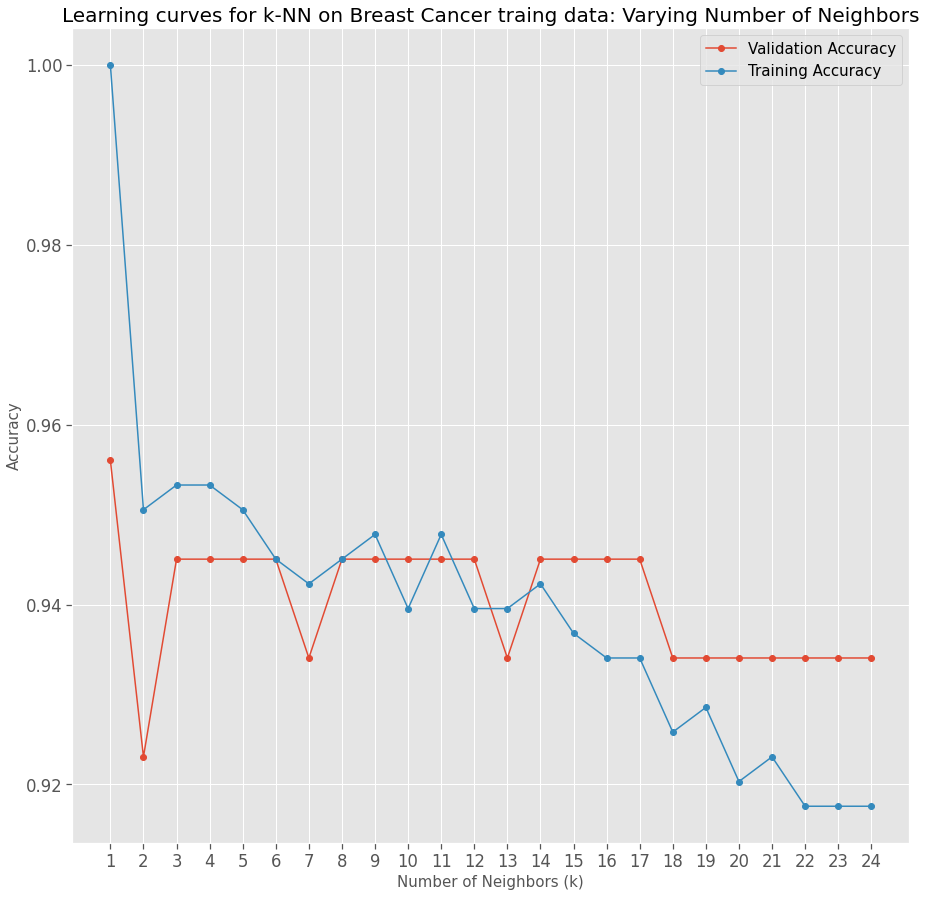

In [68]:
# Learing curves of k-NN
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
val_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr, y_tr)
    train_accuracy[i] = knn.score(X_tr, y_tr)
    val_accuracy[i] = knn.score(X_val, y_val)

plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
plt.title("Learning curves for k-NN on Breast Cancer traing data: Varying Number of Neighbors", size=20)
plt.plot(neighbors, val_accuracy, marker='o', label = 'Validation Accuracy')
plt.plot(neighbors, train_accuracy, marker='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Number of Neighbors (k)', size=15)
plt.ylabel('Accuracy', size=15)
#plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.3, 0.935), size=15, color='red')
#plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.93), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));

In [69]:
# create a knn model with best parameter: n_neighbors=3
best_knn = KNeighborsClassifier(n_neighbors=3)

# train the model by training data and evaluate the model by testing data
best_knn.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(best_knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_knn.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.912


# Part II. Ovarian cancer prediction

## Loading Ovarian cancer dataset

In [70]:
oc_dataset = pd.read_csv("../data/ovarian_cancer_dataset.csv")
oc_dataset.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [71]:
# view the column names of oc_dataset
print("Column names of data {}".format(oc_dataset.columns.values))

Column names of data ['SUBJECT_ID' 'AFP' 'AG' 'Age' 'ALB' 'ALP' 'ALT' 'AST' 'BASO#' 'BASO%'
 'BUN' 'Ca' 'CA125' 'CA19-9' 'CA72-4' 'CEA' 'CL' 'CO2CP' 'CREA' 'TYPE'
 'DBIL' 'EO#' 'EO%' 'GGT' 'GLO' 'GLU.' 'HCT' 'HE4' 'HGB' 'IBIL' 'K' 'LYM#'
 'LYM%' 'MCH' 'MCV' 'Menopause' 'Mg' 'MONO#' 'MONO%' 'MPV' 'Na' 'NEU'
 'PCT' 'PDW' 'PHOS' 'PLT' 'RBC' 'RDW' 'TBIL' 'TP' 'UA']


## Clean the ovarian cancer dataset

In [72]:
oc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    float64
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    float64
 13  CA19-9      325 non-null    float64
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [73]:
# based on the information above: two features CA72-4 and NEU have two many null data those two features together with
# SUBJECT_ID will be removed from the dataset, also rows with missing data will also be removed from the dataset
oc_dataset= oc_dataset.drop(["SUBJECT_ID", "CA72-4", "NEU"], axis=1)
oc_dataset = oc_dataset.dropna(axis=0)
oc_dataset.shape

(309, 48)

In [74]:
#Separating target from features
#drop columns "id"
y = oc_dataset.TYPE
features = oc_dataset.drop(["TYPE"], axis=1, inplace=False)

In [75]:
oc_dataset.TYPE.unique()

array([0, 1], dtype=int64)

In [76]:
# The frequency of cancer stages
M, B = oc_dataset['TYPE'].map({0:"B", 1:"M"}).value_counts()
print("Number of Malignant: ", M)
print("Number of Benign: ", B)

Number of Malignant:  169
Number of Benign:  140


d:\python_projects\cs7641_hw1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.8, 150, 'Benign = 169')

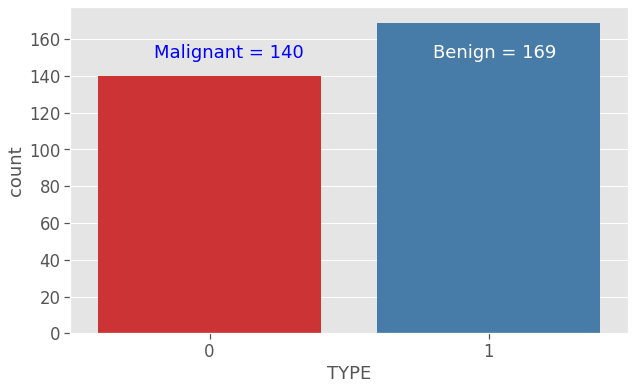

In [77]:
plt.figure(figsize=(10, 6))
sns.set_context('notebook',  font_scale=1.5)
sns.countplot('TYPE', data=oc_dataset, palette="Set1")
plt.annotate("Malignant = 140", xy=(-0.2, 150), xytext=(-0.2, 150), size=18, color="b")
plt.annotate("Benign = 169", xy=(0.8, 150), xytext=(0.8, 150), size=18, color="w")

In [78]:
#oc_dataset.columns
oc_dataset.keys()

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CEA', 'CL', 'CO2CP', 'CREA', 'TYPE', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%',
       'MPV', 'Na', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP',
       'UA'],
      dtype='object')

In [79]:
features.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,Na,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,12.344272,19.368155,44.614887,41.413269,77.433657,18.181230,18.954693,0.029709,0.499094,4.061650,...,140.476699,0.248081,14.451812,1.121262,254.197411,4.368285,13.555178,9.271197,71.423301,245.415210
std,101.035040,4.262996,15.429476,5.333244,45.986442,11.386346,8.567032,0.021142,0.349855,1.254091,...,2.809973,0.083267,3.010510,0.181403,93.025184,0.462490,1.740871,4.225661,6.684439,69.029342
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.680000,...,125.100000,0.070000,8.800000,0.570000,88.000000,2.620000,10.920000,2.500000,32.900000,96.000000
25%,1.630000,17.390000,32.000000,38.600000,60.000000,12.000000,13.000000,0.010000,0.200000,3.240000,...,138.900000,0.190000,11.900000,1.000000,202.000000,4.110000,12.400000,6.400000,68.000000,201.000000
50%,2.290000,19.970000,45.000000,42.300000,71.000000,15.000000,17.000000,0.030000,0.400000,3.850000,...,140.500000,0.240000,14.000000,1.120000,236.000000,4.380000,13.100000,8.600000,72.500000,236.300000
75%,3.450000,22.110000,57.000000,45.300000,87.000000,21.000000,22.000000,0.040000,0.700000,4.780000,...,142.400000,0.300000,17.000000,1.230000,284.000000,4.660000,14.400000,10.900000,75.800000,278.300000
max,1210.000000,33.330000,83.000000,50.900000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,...,150.700000,0.640000,22.800000,1.750000,868.000000,6.740000,22.200000,38.300000,86.800000,632.000000


In [80]:
# Standardization of features
oc_stdX = (features - features.mean()) / (features.std())
oc_data_st = pd.concat([y, oc_stdX.iloc[:, :]], axis=1)
oc_data_st = pd.melt(oc_data_st, id_vars="TYPE", var_name="features", value_name='value')

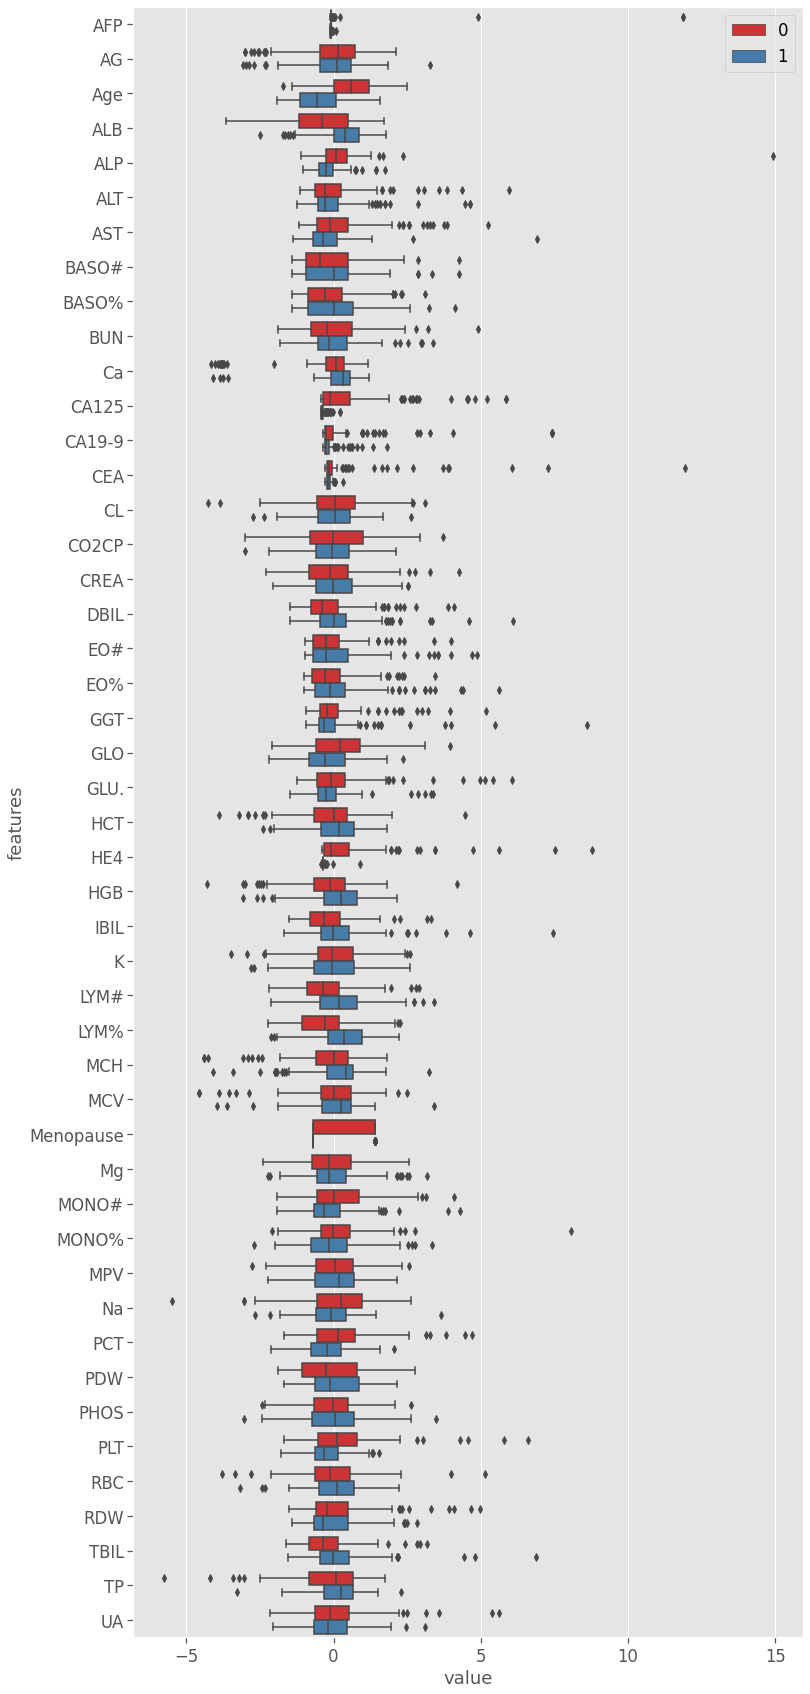

In [81]:
plt.figure(figsize=(12, 30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="TYPE", data=oc_data_st, palette="Set1")
plt.legend(loc="best")

[Text(0.5, 1.0, 'Correlation analysis of the featurs of the Ovarian Cancer dataset')]

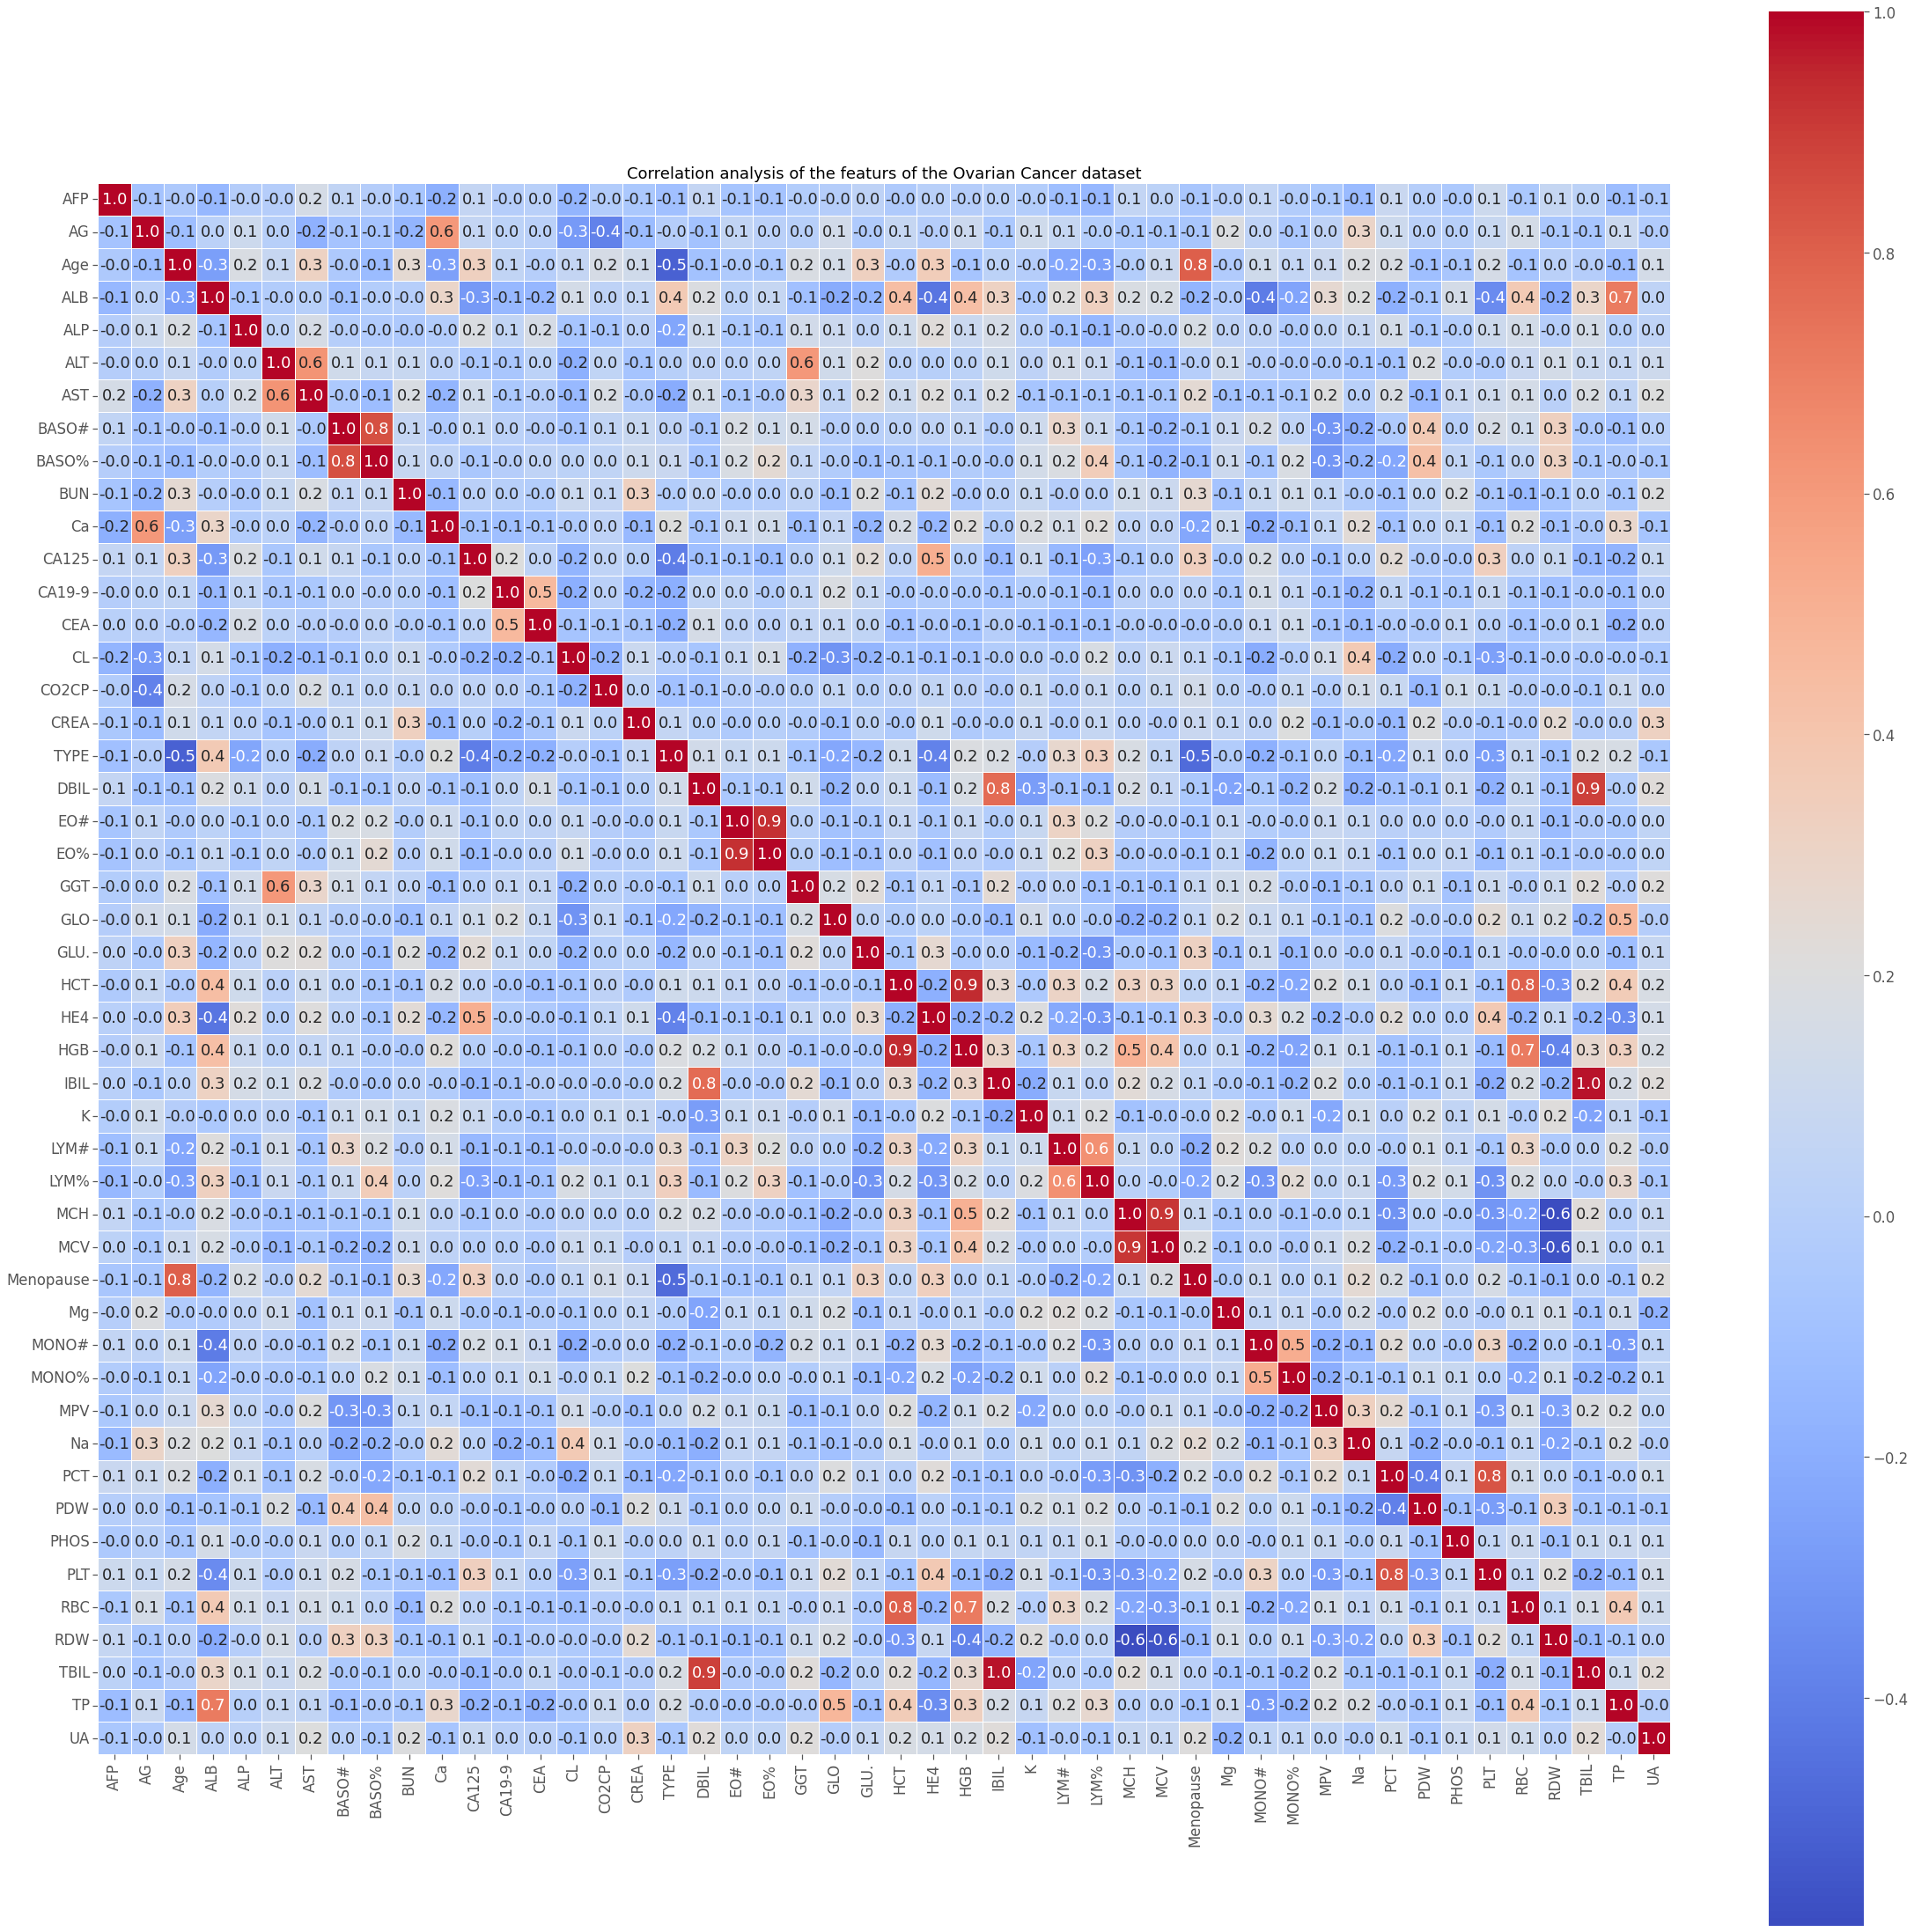

In [82]:
oc_corr = oc_dataset.corr()
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(oc_corr, cbar=True, square=True, annot=True, fmt=".1f", 
           xticklabels=True, yticklabels=True, cmap="coolwarm", linewidth=.5, ax=ax).set(title="Correlation analysis of the featurs of the Ovarian Cancer dataset")

## Decision Tree with pruning

### Splitting data into training set and testing set

In [83]:
# split the oc_dataset into traning and testing set by ratio of 4
X = oc_dataset.drop(['TYPE'], axis=1)
y = oc_dataset["TYPE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [84]:
# %%timeit -n 1000
#fitting trees of depth 1 to 24

tree_depths = range(1, 25)
oc_cv_scores_mean, oc_cv_scores_std, oc_accuracy_scores = run_cross_validation_on_decision_trees(X_train, y_train, tree_depths)

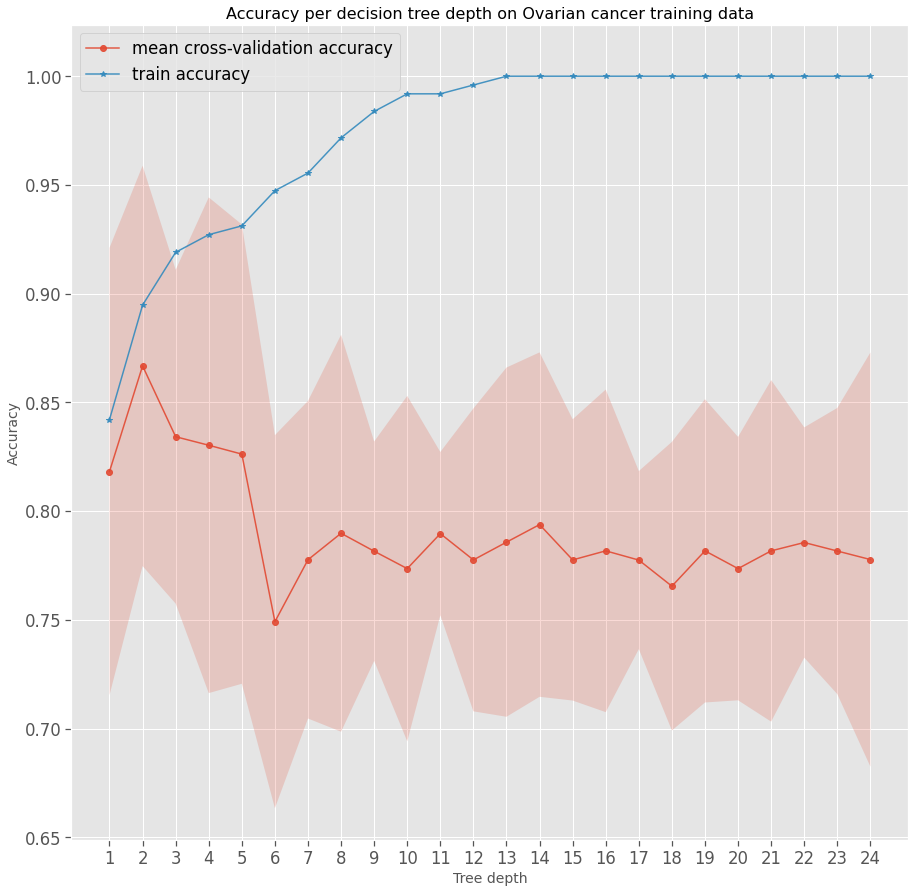

In [85]:
# plotting accuracy
plot_cross_validation_on_decision_trees(tree_depths, oc_cv_scores_mean, oc_cv_scores_std, oc_accuracy_scores,
                                       "Accuracy per decision tree depth on Ovarian cancer training data")

In [86]:
# evaluate the decision tree with best tree depth
best_tree_depth = 2
accuracy_train, accuracy_test, feature_importance = run_a_single_tree(best_tree_depth, X_train, y_train, X_test, y_test)
print("Accuracy, Training Set: {:.3f}".format(accuracy_train))
print("Accuracy, Test Set: {:.3f}".format(accuracy_test))
print("Feature importance: \n{}".format(feature_importance))

Accuracy, Training Set: 0.895
Accuracy, Test Set: 0.935
Feature importance: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.18141094 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.76992086 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0486682  0.
 0.         0.         0.         0.         0.        ]


Text(0.5, 1.0, 'Feature importance of the Ovarian Cancer dataset')

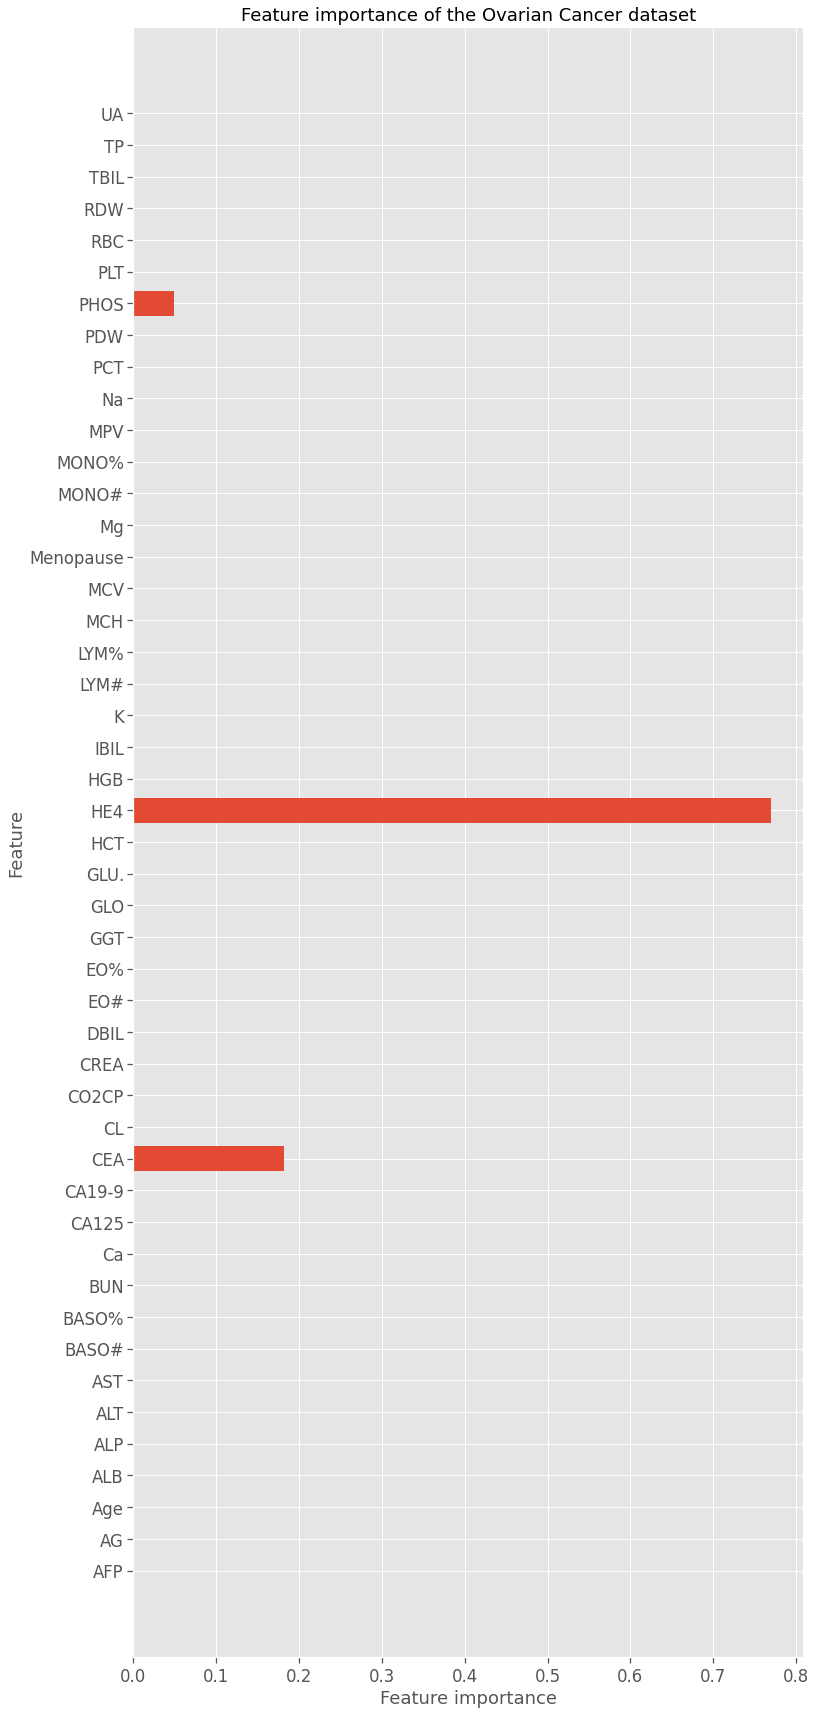

In [87]:
# plot feature importances
n_features = features.shape[1]
feature_names = features.columns.values
plt.figure(figsize=(12, 30))
plt.barh(range(n_features), feature_importance, align="center")
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature importance of the Ovarian Cancer dataset")

## Neural-Network: Keras-Tensorflow

### Prepare the data

In [88]:
## prepare data
predictors = oc_dataset.drop(["TYPE"], axis=1).values
target = to_categorical(oc_dataset.TYPE.values)


In [89]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13, stratify=y)
# split training data into train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

In [90]:
# instantiate the random search tuner object
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="../output",
    project_name="Ovarian_cancer_prediction"
)

In [91]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
dense_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
dense_units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [92]:
# %%timeit -n 1000
# start the search for the best hyperparameter configuration

tuner.search(X_tr, y_tr, epochs=50, validation_data=(X_val, y_val), callbacks=[tf.keras.callbacks.TensorBoard("../output")])

Trial 3 Complete [00h 00m 06s]
val_accuracy: 0.6899999976158142

Best val_accuracy So Far: 0.8899999856948853
Total elapsed time: 00h 00m 18s
INFO:tensorflow:Oracle triggered exit


In [93]:
# Query the results
tuner.results_summary()

Results summary
Results in ../output\Ovarian_cancer_prediction
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dense_units1: 64
dense_units2: 128
learning_rate: 0.001
Score: 0.8899999856948853
Trial summary
Hyperparameters:
dense_units1: 64
dense_units2: 64
learning_rate: 0.1
Score: 0.7300000190734863
Trial summary
Hyperparameters:
dense_units1: 32
dense_units2: 64
learning_rate: 0.1
Score: 0.6899999976158142


In [94]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the entire training data for 50 epochs
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history["val_accuracy"]
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

print("Best epoch: {}".format(best_epoch,))

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 31.3061 - accuracy: 0.5025 - val_loss: 9.5588 - val_accuracy: 0.4200
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 5.9864 - accuracy: 0.6650 - val_loss: 7.1835 - val_accuracy: 0.8000
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 7.3994 - accuracy: 0.7868 - val_loss: 8.3263 - val_accuracy: 0.8000
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 5.5873 - accuracy: 0.8122 - val_loss: 2.4863 - val_accuracy: 0.8200
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 4.0468 - accuracy: 0.7411 - val_loss: 1.1810 - val_accuracy: 0.7400
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 3.1592 - accuracy: 0.8173 - val_loss: 3.4108 - val_accuracy: 0.8200
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 2.9458 - accuracy: 0.8223 - val_loss: 1.2677 - val_accuracy: 0.8000
Epoch 8/50
7/7 [================

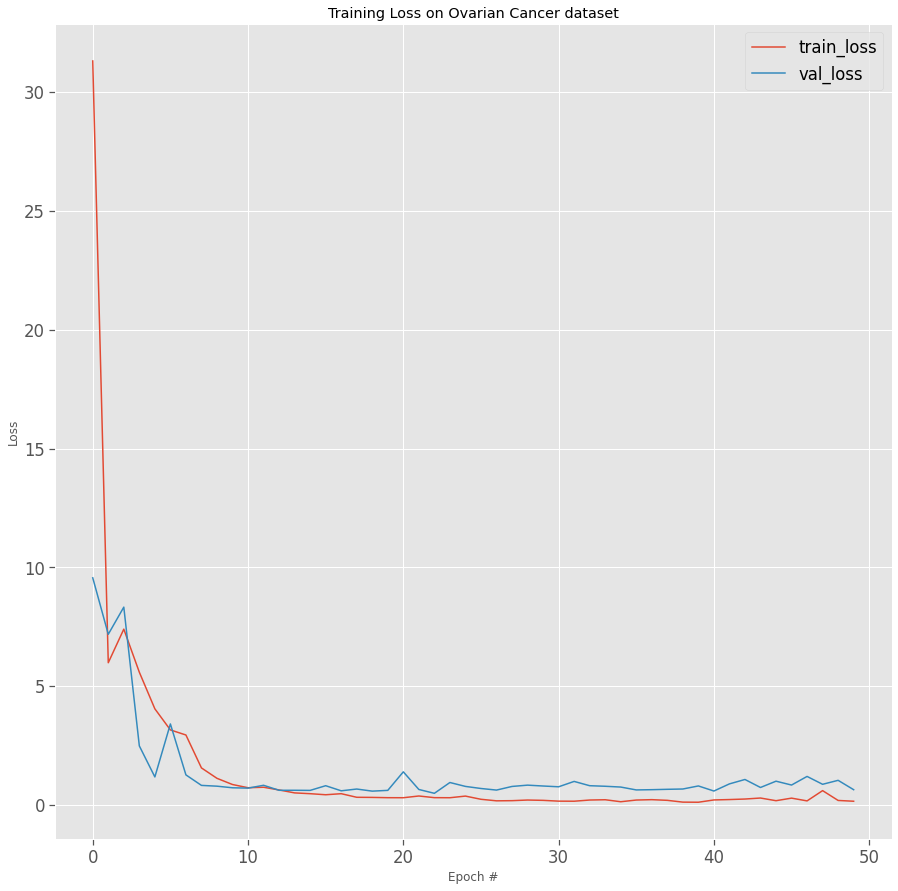

In [95]:
# plot loss of neural network
nn_plot_loss(history, "Training Loss on Ovarian Cancer dataset")

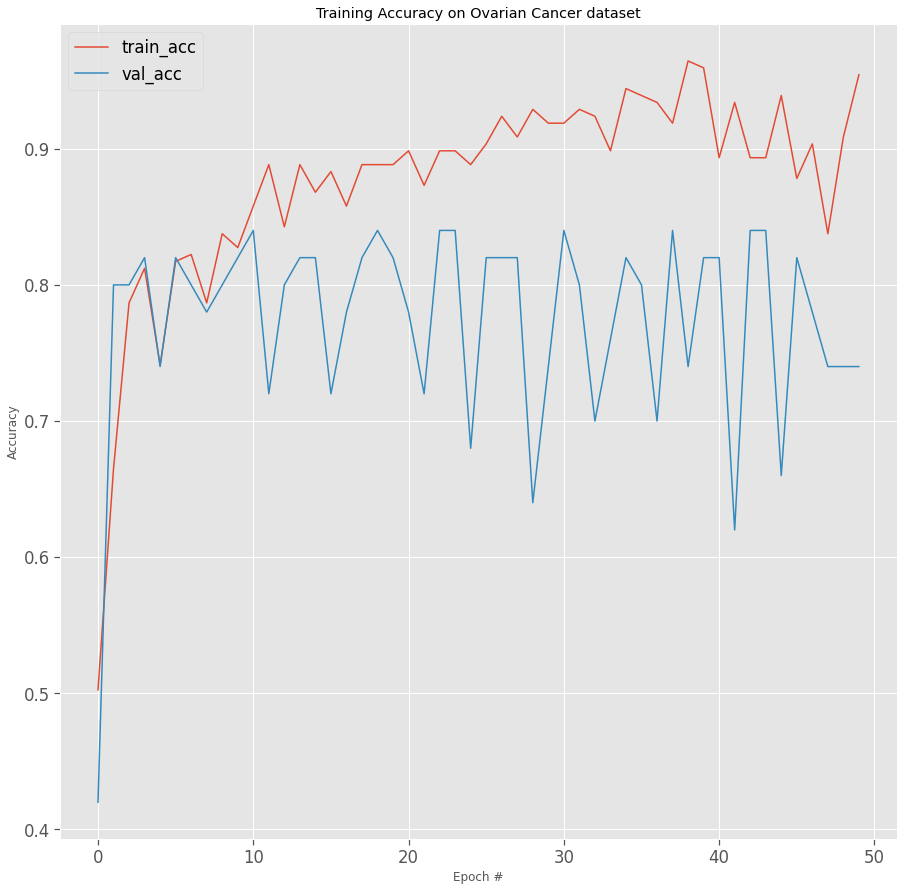

In [96]:
# plot accuracy of training of neural network model
nn_plot_accuracy(history, "Training Accuracy on Ovarian Cancer dataset")       

In [97]:
# evaluate the hypermodel on the test data
eval_result = hypermodel.evaluate(X_test, y_test)
print("Test loss: {:.4f}, Test accuracy: {:.4f}".format(eval_result[0], eval_result[1]))

2/2 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.8548
Test loss: 0.5683, Test accuracy: 0.8548


## Boosting

In [98]:
# prepare data 
X = oc_dataset.drop(['TYPE'], axis=1)
y = oc_dataset["TYPE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [99]:
# instantiate a Boosting classifier and define the parameters
gbc_oc = GradientBoostingClassifier()

parameters = {
    "n_estimators":[5, 50, 250, 500],
    "max_depth":[1, 2, 3, 4, 5],
    "learning_rate":[0.001, 0.01, 0.1, 1, 10]
}


In [100]:
# %%timeit -n 1000
# Use the GridSearhCV for the cross-validation

cv = GridSearchCV(gbc_oc, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 50, 250, 500]})

In [101]:
print("Best estimator:\n{}".format(cv.best_estimator_))

Best estimator:
GradientBoostingClassifier(n_estimators=500)


In [102]:
results = pd.DataFrame(cv.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009584,0.000926,0.002409,0.000480,0.001,1,5,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.54,0.54,0.551020,0.551020,0.551020,0.546612,0.005399,74
1,0.056209,0.004804,0.002258,0.000385,0.001,1,50,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.54,0.54,0.551020,0.551020,0.551020,0.546612,0.005399,74
2,0.261827,0.026125,0.002001,0.000633,0.001,1,250,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.78,0.76,0.897959,0.795918,0.857143,0.818204,0.051422,52
3,0.448000,0.029179,0.002197,0.000745,0.001,1,500,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.78,0.76,0.897959,0.795918,0.857143,0.818204,0.051422,52
4,0.009818,0.001721,0.001598,0.000494,0.001,2,5,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.54,0.54,0.551020,0.551020,0.551020,0.546612,0.005399,74


In [103]:
results_toplot = results[["param_learning_rate", "param_max_depth", "param_n_estimators", "mean_test_score"]]

In [104]:
results_toplot.iloc[results_toplot["mean_test_score"].argmax()]

param_learning_rate         0.1
param_max_depth               3
param_n_estimators          500
mean_test_score        0.866776
Name: 51, dtype: object

Text(0.5, 1.0, 'Mean test score vs learning rate on Ovarian Cancer dataset')

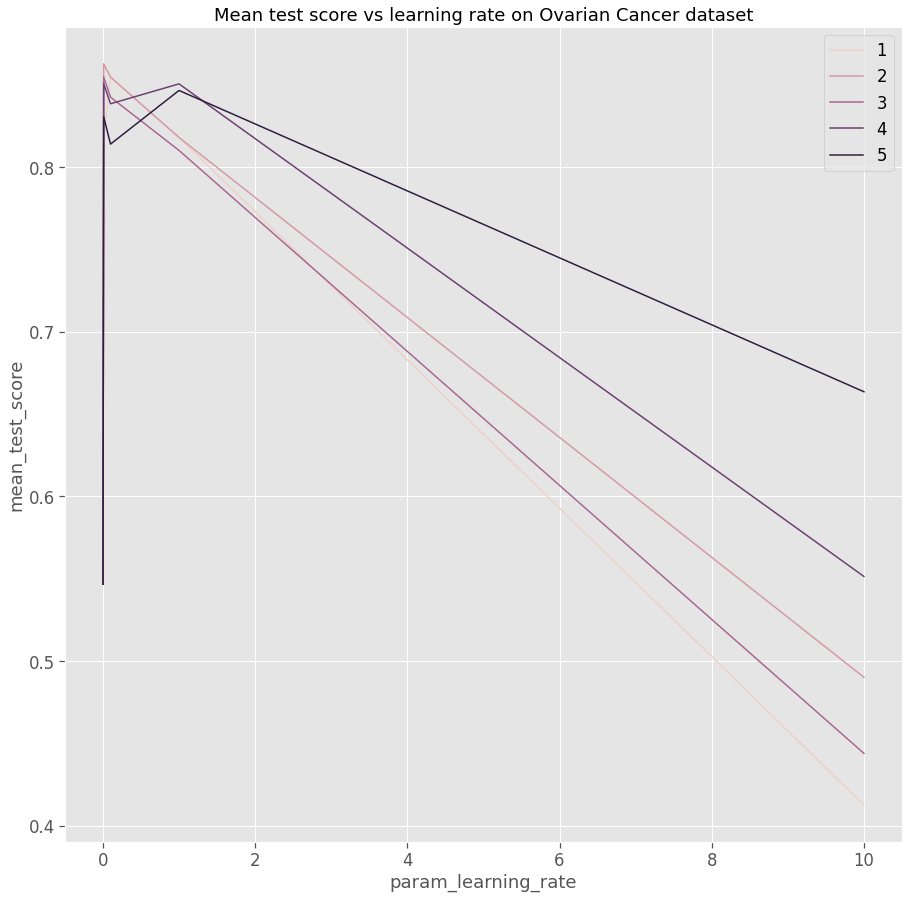

In [105]:
#plot the mean_test_score by learning rate and max_depth
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_learning_rate", y="mean_test_score", hue="param_max_depth",
                     data=results_toplot.loc[results_toplot["param_n_estimators"]==50])
plt.legend(loc="best")
plt.title("Mean test score vs learning rate on Ovarian Cancer dataset")

In [106]:
# define the model based on the best hyperparameters
model = GradientBoostingClassifier(n_estimators=500, max_depth=3, learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)
print("Accuracy on training set: {:3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.952


## Support Vector Machine

In [107]:
# prepare data 
X = oc_dataset.drop(['TYPE'], axis=1)
y = oc_dataset["TYPE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [108]:
# search for the best hyperparameters
# SVC has a kernel parameter, depending on which kenerl is chosen, other parameters will be relevant.
# If kernal="linear", only the C parameter is used. If kernel='rbf', both the C and gamma are used.
param_grid = [{'kernel':['rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {
                 'kernel':['linear'],
                 'C':[0.001, 0.01, 0.1, 0.1, 1, 10, 100]
             }]

In [109]:
# %%timeit -n 1000
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.867


In [110]:
svm_results = pd.DataFrame(grid_search.cv_results_)
display(svm_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004660,0.001072,0.002999,0.000632,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.54,0.54,0.55102,0.55102,0.55102,0.546612,0.005399,11
1,0.004231,0.000746,0.002815,0.000418,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.54,0.54,0.55102,0.55102,0.55102,0.546612,0.005399,11
2,0.006016,0.000905,0.003602,0.001022,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.54,0.54,0.55102,0.55102,0.55102,0.546612,0.005399,11
3,0.006400,0.000800,0.003805,0.000404,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.54,0.54,0.55102,0.55102,0.55102,0.546612,0.005399,11
4,0.005611,0.000806,0.002999,0.000631,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.54,0.54,0.55102,0.55102,0.55102,0.546612,0.005399,11


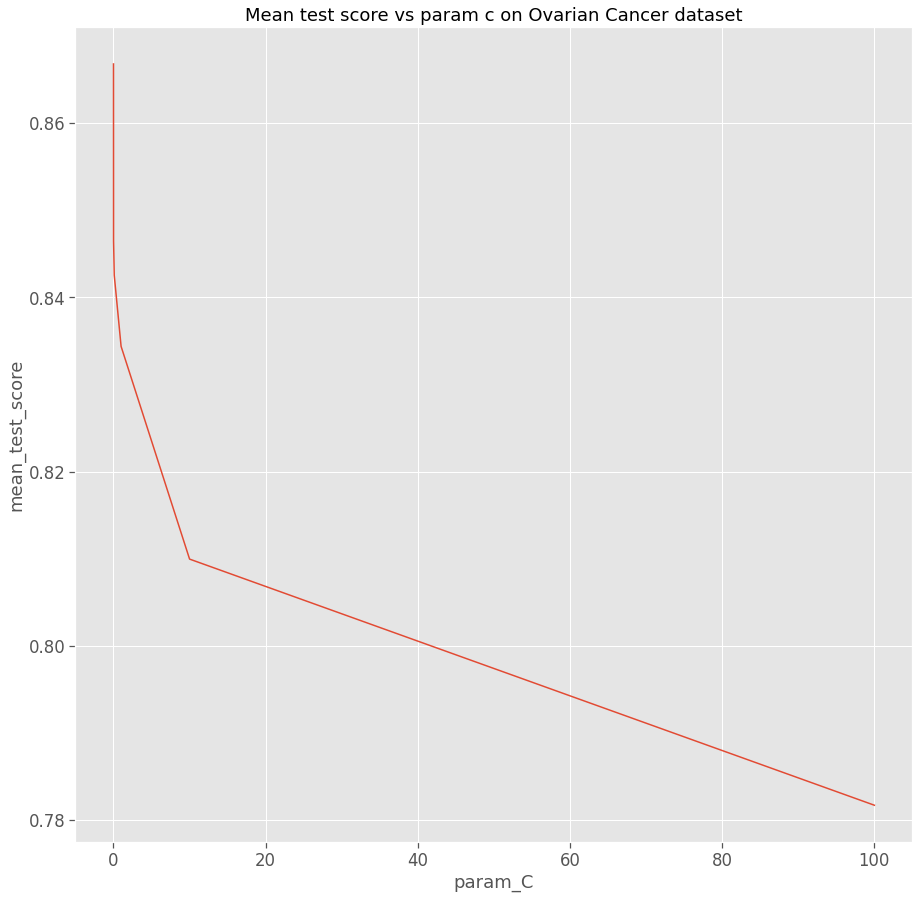

In [111]:
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_C", y="mean_test_score",
                     data=svm_results.loc[svm_results["param_kernel"]=="linear"]).set(title="Mean test score vs param c on Ovarian Cancer dataset")


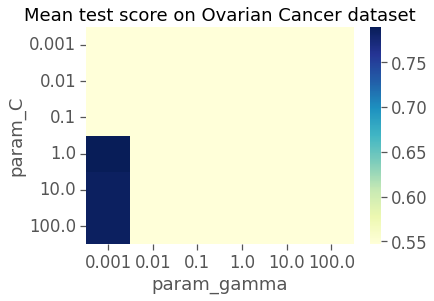

In [112]:
svm_results_rbf = svm_results.loc[svm_results["param_kernel"]=="rbf"]
svm_results_rbf = svm_results_rbf[["param_C", "param_gamma", "mean_test_score"]]
rbf_scores = svm_results_rbf.pivot("param_C", "param_gamma", "mean_test_score")
# plot the mean cross-validation scores of svm with rbf kernel
ax =sns.heatmap(rbf_scores, cmap="YlGnBu").set(title="Mean test score on Ovarian Cancer dataset")

In [113]:
# evaluate SVM with linear kernel with best parameter C of 100
svm_linear = SVC(kernel="linear", C=0.001)
svm_linear.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svm_linear.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_linear.score(X_test, y_test)))

Accuracy on training set: 0.899
Accuracy on test set: 0.919


In [114]:
# evaluate SVM with rbf kernel with best parameter C of 1, gamma of 0.001
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.001)
svm_rbf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(svm_rbf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_rbf.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.742


## k-Nearest Neighbors

In [115]:
# prepare data 
X = oc_dataset.drop(['TYPE'], axis=1)
y = oc_dataset["TYPE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [116]:
# %%timeit -n 1000
# create a knn model

knn = KNeighborsClassifier()

# create a dictionary of all values to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [117]:
# check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 5}

In [118]:
# check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8300408163265306

In [119]:
knn_results = pd.DataFrame(knn_gscv.cv_results_)
display(knn_results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001613,0.000499,0.002300,0.000379,1,{'n_neighbors': 1},0.82,0.78,0.775510,0.755102,0.857143,0.797551,0.036472,23
1,0.001207,0.000398,0.001990,0.000636,2,{'n_neighbors': 2},0.86,0.70,0.775510,0.673469,0.795918,0.760980,0.067251,24
2,0.001391,0.000487,0.003203,0.000399,3,{'n_neighbors': 3},0.82,0.80,0.836735,0.816327,0.816327,0.817878,0.011701,15
3,0.001399,0.000489,0.003002,0.000638,4,{'n_neighbors': 4},0.84,0.82,0.816327,0.816327,0.816327,0.821796,0.009213,14
4,0.001412,0.000504,0.002600,0.000799,5,{'n_neighbors': 5},0.78,0.86,0.836735,0.857143,0.816327,0.830041,0.029560,1


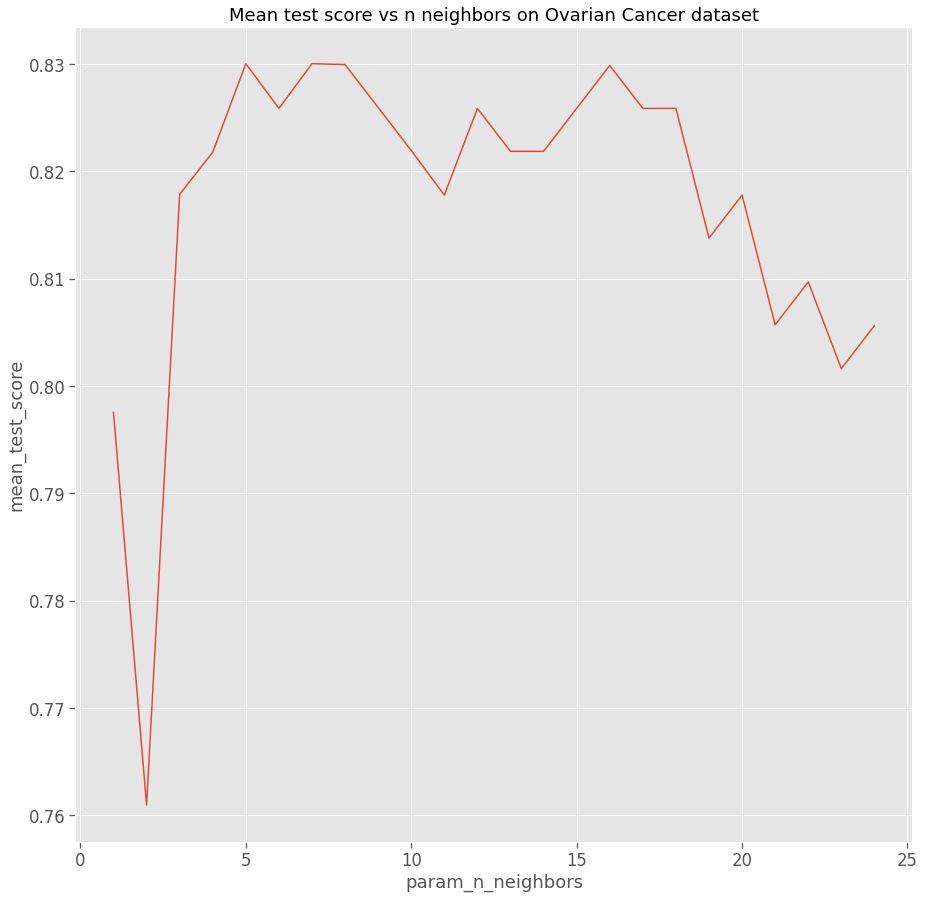

In [120]:
# plot the mean_test_score againt n_neighbors
plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
pp = sns.lineplot(x="param_n_neighbors", y="mean_test_score",
                     data=knn_results).set(title="Mean test score vs n neighbors on Ovarian Cancer dataset")

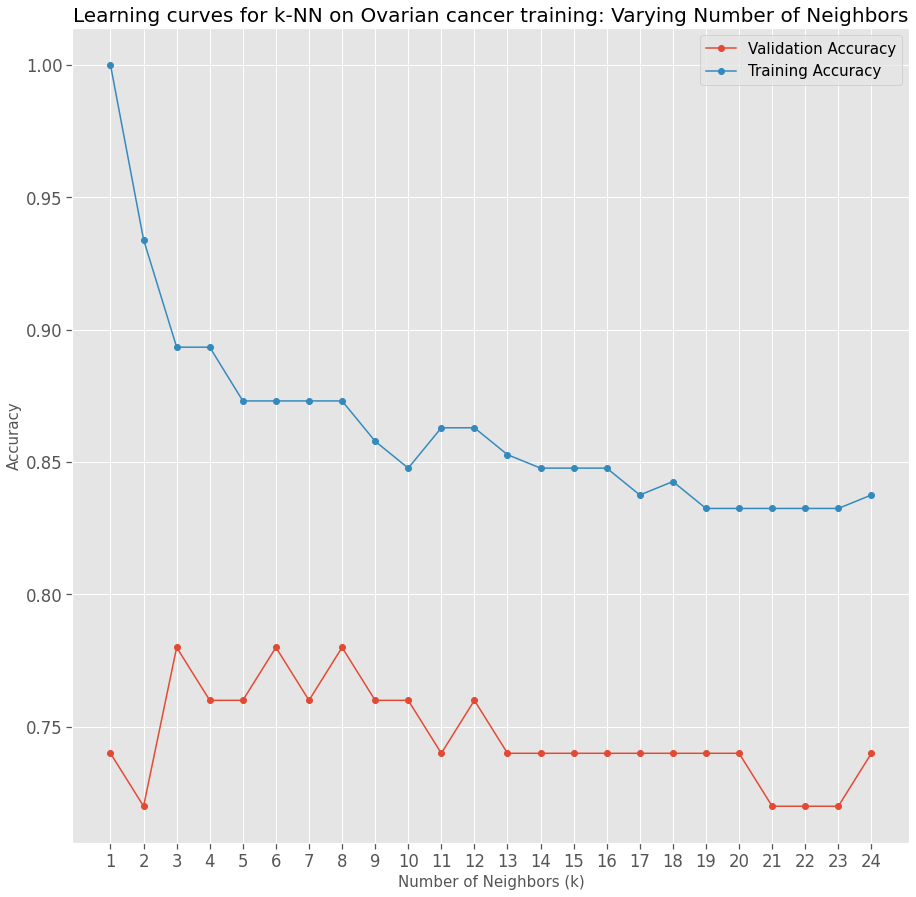

In [121]:
# Learing curves of k-NN
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13, stratify=y_train)

neighbors = np.arange(1,25)
train_accuracy = np.empty(len(neighbors))
val_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr, y_tr)
    train_accuracy[i] = knn.score(X_tr, y_tr)
    val_accuracy[i] = knn.score(X_val, y_val)

plt.figure(figsize=(15, 15))
sns.set_context('notebook', font_scale=1.5)
plt.title("Learning curves for k-NN on Ovarian cancer training: Varying Number of Neighbors", size=20)
plt.plot(neighbors, val_accuracy, marker='o', label = 'Validation Accuracy')
plt.plot(neighbors, train_accuracy, marker='o', label = 'Training Accuracy')
plt.legend(prop={'size':15})
plt.xlabel('Number of Neighbors (k)', size=15)
plt.ylabel('Accuracy', size=15)
#plt.annotate('Over-fitting', xy=(0.5, 0.85), xytext=(0.3, 0.85), size=15, color='red')
#plt.annotate('Under-fitting', xy=(0.5, 0.85), xytext=(18, 0.85), size=15, color='red')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0));

In [122]:
# create a knn model with best parameter: n_neighbors=3
best_knn = KNeighborsClassifier(n_neighbors=3)

# train the model by training data and evaluate the model by testing data
best_knn.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(best_knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_knn.score(X_test, y_test)))

Accuracy on training set: 0.891
Accuracy on test set: 0.855
